In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk
#import networkx as nx
import re 

path = "c:/Facultad/Tesis/"
base = pd.read_csv(path+'Corpus_medios_nac.csv')
#base2 = pd.read_csv(path+'Corpus_medios_nac.csv', nrows=20, skiprow


C:\Users\Asus\AppData\Local\Temp\ipykernel_11744\2971568352.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv(path+'Corpus_medios_nac.csv')


In [2]:
base['fecha'] = pd.to_datetime(base['fecha'])
#fecha_inicio = pd.to_datetime('2019-01-01')
#fecha_fin = pd.to_datetime('2019-04-01')


#fecha_inicio = pd.to_datetime('2020-06-01')
#fecha_fin = pd.to_datetime('2021-01-01')

fecha_inicio = pd.to_datetime('2021-06-01')
fecha_fin = pd.to_datetime('2021-08-01')
tres_meses = base[(base['fecha'] >= fecha_inicio) & (base['fecha'] <= fecha_fin)]


In [3]:
def replace(x):
    x = str(x)
    x = x.replace('”', '"')
    x = x.replace('“', '"')
    x = x.replace('”', '"')
    x = x.replace('\x93', '"')
    x = x.replace('\x94', '"')
    
    return x

def extract_quotes(x):
    return re.findall('"([^"]*)"', x)

def words_length(x):
    return len(x.split(" "))

In [4]:
base['nota'] = base['nota'].apply(replace)
base['citas']  = base['nota'].apply(extract_quotes)

In [5]:
np.where(type(base['nota']) == float)
np.where(np.isnan(base['nota'] == True))

type(1.1) is float

True

In [4]:
def pre_process_quoted(df):
    df['nota'] = df['nota'].apply(replace)
    df['citas']  = df['nota'].apply(extract_quotes)
    df_quoutes2 = pd.DataFrame({'Fecha': df['fecha'].iloc[1:], 'Hora': df['hora'].iloc[1:], 'Cita': df['citas'].iloc[1:], 'Link': df['link'].iloc[1:], 'Nota': df['nota'].iloc[1:]})
    df_quoutes = df_quoutes2.explode('Cita') # Cada cita sea una fila distinta
    df_quoutes = df_quoutes.dropna(subset=['Cita']) # Elimino la filas que no haya quotes

    #df_quoutes['Citas'] = df_quoutes['Citas'].apply(replace)

    df_quoutes = df_quoutes.reset_index()
    df_quoutes = df_quoutes.drop(['index'], axis = 1)
    df_quoutes['Cant_Palabras'] = df_quoutes['Cita'].apply(words_length) # genero columna que cuente la cantidad de plabaras
    df_quoutes_pf = df_quoutes[df_quoutes['Cant_Palabras'] > 4]
    df_quoutes_pf = df_quoutes_pf[df_quoutes_pf['Cant_Palabras'] < 60]
    df_quoutes_pf = df_quoutes_pf.reset_index()
    df_quoutes_pf = df_quoutes_pf.drop(['index'], axis = 1)
    return df_quoutes_pf

In [5]:
filt_tres_meses = pre_process_quoted(tres_meses)
#pk.dump(list(filt_tres_meses['Cita']), open('nac_barcos.pk', 'wb'))
#filt_tres_meses.to_csv(path+'tres_meses.csv', compression='zip')

C:\Users\Asus\AppData\Local\Temp\ipykernel_11744\773064045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nota'] = df['nota'].apply(replace)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11744\773064045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['citas']  = df['nota'].apply(extract_quotes)


In [7]:
df_quoutes2 = pd.DataFrame({'Fecha': base['fecha'].iloc[1:], 'Hora': base['hora'].iloc[1:], 'Citas': base['citas'].iloc[1:], 'Link': base['link'].iloc[1:], 'Nota': base['nota'].iloc[1:]})
df_quoutes = df_quoutes2.explode('Citas') # Cada cita sea una fila distinta
df_quoutes = df_quoutes.dropna(subset=['Citas']) # Elimino la filas que no haya quotes

#df_quoutes['Citas'] = df_quoutes['Citas'].apply(replace)

df_quoutes = df_quoutes.reset_index()
df_quoutes = df_quoutes.drop(['index'], axis = 1)
df_quoutes['Cant_Palabras'] = df_quoutes['Citas'].apply(words_length) # genero columna que cuente la cantidad de plabaras
df_quoutes_pf = df_quoutes[df_quoutes['Cant_Palabras'] > 4]
df_quoutes_pf = df_quoutes_pf[df_quoutes_pf['Cant_Palabras'] < 60]
df_quoutes_pf = df_quoutes_pf.reset_index()
df_quoutes_pf = df_quoutes_pf.drop(['index'], axis = 1)


In [20]:
np.where(df_quoutes_pf['Cant_Palabras'] == max(df_quoutes_pf['Cant_Palabras']))

df_quoutes_pf.sort_values(by= ['Cant_Palabras'], ascending = False)[0:5]

,Fecha,Hora,Citas,Link,Nota,Cant_Palabras
1878467,2018/09/03,NaN,"Lamentablemente no todos entienden esto, como ...",https://www.diarioprensa.com.ar/gorbacz-el-cam...,"El ministro Jefe de Gabinete Leonardo Gorbacz,...",59
1374552,2019/02/21,15:43,Observamos nuevas tendencias y también muchas...,https://misionesonline.net/2019/02/21/la-yerba...,Una comitiva integrada por seis establecimient...,59
1865126,2020/08/28,18:48,Desde el Gobierno se trabaja para que el salar...,https://www.elliberal.com.ar/noticia/economia/...,La ministra de Desarrollo Territorial y Hábit...,59
2062287,2021/05/28,NaN,Me sorprende (el fallo) porque las pruebas dic...,https://www.losprimeros.tv/nota/politica/26327...,"Esta tarde, el Tribunal Oral de Menores 2 de C...",59
452973,2021/02/09,NaN,"La Matanza no es grande, es grandiosa y lo es ...",https://www.pagina12.com.ar/322809-espinoza-fi...,"El intendente de La Matanza, Fernando Espinoza...",59


In [21]:
num = 4
print(df_quoutes_pf['Citas'][num])
print(df_quoutes_pf['Link'][num])

La evolución de la situación macroeconómica general continúa ocupando el centro de nuestra atención. Es nuestra voluntad, lograr una recuperación de la rentabilidad buscando una mejor absorción de los mayores costos sin que ello implique una reducción sobre nuestros volúmenes de venta
https://www.ambito.com/edicion-impresa/la-serenisima-acumula-perdidas-2200-m-9-meses-n4038820


In [22]:
notas_comillas_impar = 0
for i,notes in enumerate(list(df_quoutes['Nota'])):
    cant_com = notes.count('"')
    if cant_com%2 != 0:
        notas_comillas_impar+=1

print(notas_comillas_impar)

342061


In [25]:
342061/2950690

0.11592576651562855

las frases de lkvec tienen en promedio 16 palabras y con un maximo de 1712

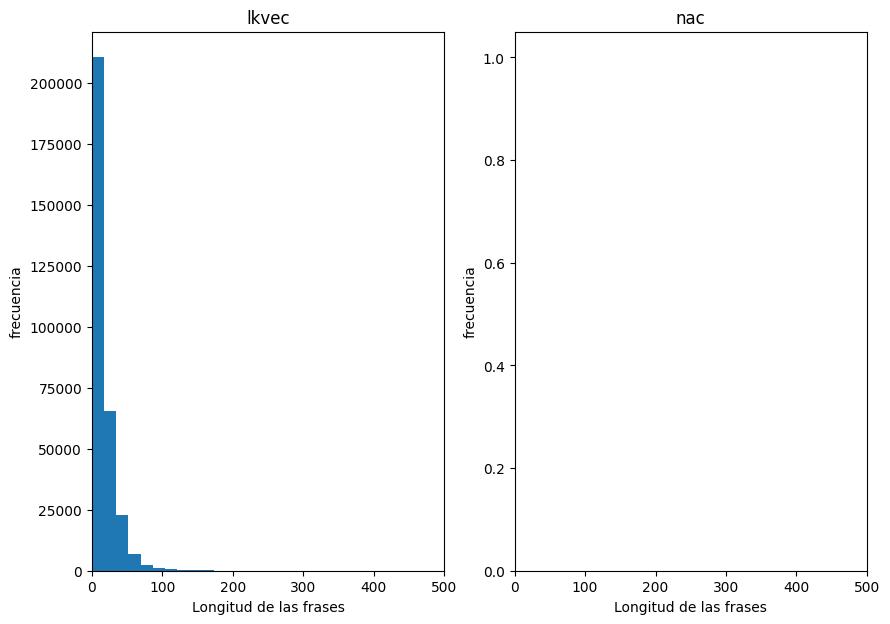

In [18]:
import matplotlib.pyplot as plt

lkvec = pd.read_csv(path+'all_data.csv')
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,7))
titles = ['lkvec', 'nac']
data = [lkvec['len'], df_quoutes_pf['Cant_Palabras']]
for i,ax in enumerate([ax1, ax2]):
    ax.hist(data[i], bins = np.linspace(0,max(data[i]), 100))
    ax.set_xlabel('Longitud de las frases')
    ax.set_ylabel('frecuencia')
    ax.set_title(titles[i])
    ax.set_xlim([0,500])
plt.show()

In [112]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

a = model.encode(lkvec['phrases'][:10])
a[0]

array([-2.21558008e-02,  6.63395748e-02,  5.53568639e-02,  2.47053206e-02,
       -7.16889277e-02,  3.22862994e-03,  4.08154391e-02, -2.75777057e-02,
       -9.11479965e-02, -1.14120543e-02,  2.88396925e-02, -5.39754517e-02,
       -6.12482727e-02,  8.91649071e-03,  4.11491804e-02,  6.21872991e-02,
        1.47094214e-02,  2.26784218e-02, -1.23631366e-01,  3.80378142e-02,
       -3.29656117e-02, -1.08780619e-02,  4.20261659e-02,  2.15464104e-02,
       -5.16289994e-02,  4.67112288e-02, -3.35476734e-02, -2.63182214e-03,
        5.33636436e-02,  1.25301527e-02,  1.77862234e-02,  1.68917403e-02,
        5.06917201e-02,  6.53340071e-02, -7.57383648e-04,  8.63520280e-02,
        1.10835180e-01,  5.72813116e-03,  2.14355849e-02, -3.43584944e-03,
        2.09409725e-02, -1.08468950e-01, -3.49332616e-02, -1.11203967e-02,
       -2.97115259e-02, -1.42304208e-02,  3.30951507e-03, -4.44539711e-02,
        3.09040938e-02, -1.02700159e-01,  1.25114433e-02, -4.09805477e-02,
       -7.33012408e-02, -